In [1]:
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords

import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
import tensorflow
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense,BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D,Conv1D,LSTM,MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib
import matplotlib.pyplot as plt



## LOAD DATASET

In [2]:
df = pd.read_csv("Coronavirus_dec05.csv")

df.isnull().values.any()

#df_duplicates_removed = pd.DataFrame.drop_duplicates(df)
#print(df_duplicates_removed)

df = df.rename(columns = { '3': 'Tweet'}, inplace = False)
df = df[["Tweet"]]
#df.to_csv(r'C:\Users\ puspa\dev\DataScience\ML\sampledataTest.csv', index=False) 

df.shape

(18100, 1)

In [3]:
df.head()


,Tweet
0,RT @luvjuan: MayGODBlessAllSouls \nHopePeace \...
1,RT @a_bee_yo: sorry I can't hang out because o...
2,RT @MurtazaViews: PDM not permitted to hold De...
3,RT @CBSLA: A restaurant owner who was forced t...
4,RT @SuMoh7: WORTH READING IN FULL &gt;&gt;&gt;...


## SENTIMENT LEVELING BY NLP

In [3]:
#sentimenet lebeling
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def sentiment_score(tweet):
    # Calling the polarity_scores method on sid and passing in the text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    text = "'''" + str(tweet) + "'''"
    scores=sid.polarity_scores(text)   
    return sentiment_lebel(scores["compound"])

def sentiment_lebel(score):
    #-1 to -0.5 , -0.5 to 0 ,   0 to 0.5  ,   0.5 to  1
    if score < -0.5 and score >= -1:
     return "Storngly Nagative"
    elif score < 0 and score >= -0.5 :
     return "Nagative"
    if score==0:
     return "Neutral"
    elif score >0 and score <= 0.5:
     return "Positive"
    elif score > 0.5 and score <= 1:
     return "Storngly Positive"
    else:
     return "NAN"
    
    
    
df["sentiment"] = df["Tweet"].apply(lambda tweet: sentiment_score(tweet))
#df.to_csv(r'C:\Users\puspa\dev\DataScience\ML\sampledata.csv', index=False) 


In [9]:
df.head()

,Tweet,sentiment
0,RT @luvjuan: MayGODBlessAllSouls \nHopePeace \...,Storngly Positive
1,RT @a_bee_yo: sorry I can't hang out because o...,Nagative
2,RT @MurtazaViews: PDM not permitted to hold De...,Neutral
3,RT @CBSLA: A restaurant owner who was forced t...,Storngly Nagative
4,RT @SuMoh7: WORTH READING IN FULL &gt;&gt;&gt;...,Positive


##PLOTING THE DATA

<AxesSubplot:xlabel='sentiment', ylabel='count'>

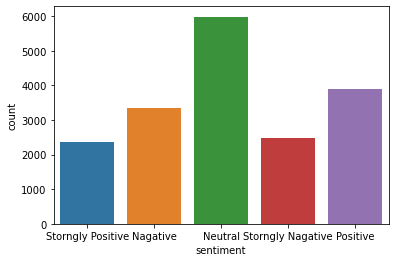

In [6]:
import seaborn as sns

sns.countplot(x='sentiment', data=df)

# TEXT PREPROCESS START

In [4]:
from num2words import num2words
# function to convert numbers to words
def num_to_words(text):
    # splitting text into words with space
    after_spliting = text.split()

    for index in range(len(after_spliting)):
        if after_spliting[index].isdigit():
            after_spliting[index] = num2words(after_spliting[index])

    # joining list into string with space
    numbers_to_words = ' '.join(after_spliting)
    return numbers_to_words


def preprocess_text(sen):
     
    # converting tolower
    sentence=sen.lower
    
    #removing urls
    sentence = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', sen)
    
    sentence= re.sub(r"@[\w]*","",sentence)
    
    # Removing html tags
    sentence = remove_tags(sentence)

    # Convert numbers to words
    sentence = num_to_words(sentence)
    
    
    # Remove punctuations and numbers
    #sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
     # Removing RT 
    sentence=re.sub(r'RT : ','',sentence)
    
    #spell check
   # sentence = spell_correction(sentence)

    return sentence

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

X = []
sentences = list(df['Tweet'])
for sen in sentences:
    X.append(preprocess_text(sen))
    
y = df['sentiment']


#my_df = {'Tweet': X,  
#         'Sentiment': y  
#        } 

#df = pd.DataFrame(my_df) 
#df.to_csv(r'C:\Users\puspa\dev\DataScience\ML\cleanSampledataTest.csv', index=False) 




In [11]:
len(X)


18100

In [36]:
len(y)

18100

#  TEXT PREPROCESS END

# LabelEncoder START

In [5]:
import sklearn
lab_enc =sklearn.preprocessing.LabelEncoder()

y_encoded = lab_enc.fit_transform(y)

In [9]:
np.unique(y_encoded)

array([0, 1, 2, 3, 4])

In [39]:
np.unique(y)

array(['Nagative', 'Neutral', 'Positive', 'Storngly Nagative',
       'Storngly Positive'], dtype=object)

In [9]:
label_text = list(np.unique(y))
#label_text = label_text[:, None] 
label_numeric = list(np.unique(y_encoded))
#label_numeric = label_numeric[:,None]

In [10]:
len(label_numeric)

5

# LabelEncoder END

In [42]:
df_labels = pd.DataFrame(list(zip(label_text,label_numeric)),columns=['Text','Numeric'])

In [43]:
df_labels

,Text,Numeric
0,Nagative,0
1,Neutral,1
2,Positive,2
3,Storngly Nagative,3
4,Storngly Positive,4


In [337]:
df_labels.to_csv('Labels.csv')

In [296]:
# transform the dataset
#X=X[:, None] 
#X=np.array(X) 
#y=np.array(y) 


In [44]:
len(X)


18100

In [45]:
y.shape

(18100,)

# TRAIN TEST SPLIT START

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42,shuffle=True)

In [11]:
type(X_train)

list

In [12]:
X_train[0]

'Discrepancies in Alaska DHSS Data Leave Alaskans Concerned'

# TRAIN TEST SPLIT END

In [74]:
print('Train_X : ',len(X_train))
print('Test_X : ',len(X_test))
print('Train_Y : ',len(y_train))
print('Test_Y : ',len(y_test))

Train_X :  14480
Test_X :  3620
Train_Y :  14480
Test_Y :  3620


In [75]:
Y_train = pd.DataFrame(y_train,columns=['sentiment'])

In [76]:
dict_label = Y_train['sentiment'].value_counts()

In [77]:
max(dict_label)

4829

<AxesSubplot:xlabel='sentiment', ylabel='count'>

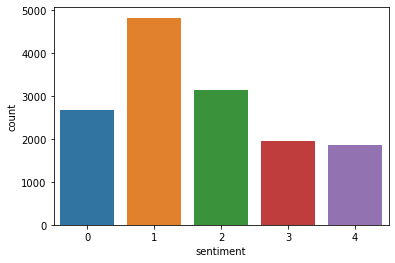

In [78]:
sns.countplot(x='sentiment', data=Y_train)

In [79]:
#data_train = pd.DataFrame(X_train)
data_train = pd.DataFrame()
data_train['Tweet'] =X_train
data_train['sentiment'] = y_train
data_train.head()

,Tweet,sentiment
0,Discrepancies in Alaska DHSS Data Leave Alaska...,0
1,North Texas Bars have to close for third time ...,1
2,#Iran: The People’s Mojahedin Organization of ...,1
3,Boulder County records one hundred and thirty ...,0
4,live in Kentucky. People are hurting. Coronavi...,3


# WORDCLOUD START

In [55]:
data_train[data_train["sentiment"]==1].shape

(4829, 2)

In [80]:
class0 = " ".join(text for text in data_train[data_train["sentiment"]==0].Tweet)
class1 = " ".join(text for text in data_train[data_train["sentiment"]==1].Tweet)
class2 = " ".join(text for text in data_train[data_train["sentiment"]==2].Tweet)
class3 = " ".join(text for text in data_train[data_train["sentiment"]==3].Tweet)
class4 = " ".join(text for text in data_train[data_train["sentiment"]==4].Tweet)

Text(0.5, 1.0, 'class2 Wordcloud')

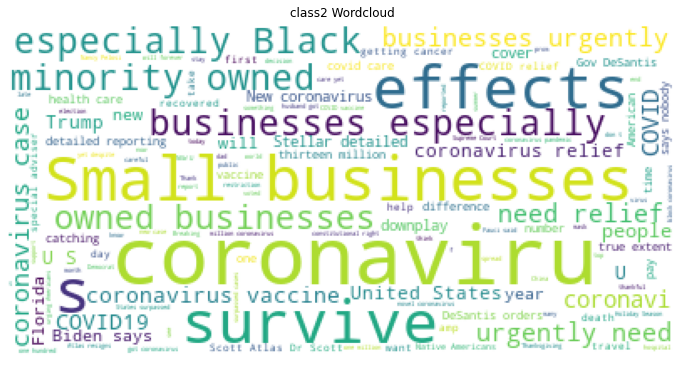

In [81]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(class2)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("class2 Wordcloud")

# WORDCLOUD END

# Tokenizer Start

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)



In [18]:
maxLengthTrain = max(len(x) for x in X_train ) 
maxLengthTest = max(len(x) for x in c ) 
print(maxLengthTrain)
print(maxLengthTest)

52
52


In [8]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [127]:

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Create the layer.
vectorize_layer = TextVectorization(
 max_tokens=vocab_size,
 output_mode='int',
 output_sequence_length=100)

# Now that the vocab layer has been created, call `adapt` on the text-only
# dataset to create the vocabulary. You don't have to batch, but for large
# datasets this means we're not keeping spare copies of the dataset.
Train_X_Vector = tensorflow.data.Dataset.from_tensor_slices(list(data_train['Tweet']))
vectorize_layer.adapt(Train_X_Vector.batch(64))

In [125]:
vectorize_layer

# Tokenizer END

In [6]:
X_train.shape

NameError: name 'X_train' is not defined

## DATA NORMALIZATION

In [10]:
from sklearn import preprocessing
X_train_normalized = preprocessing.normalize(X_train)
X_test_normalized = preprocessing.normalize(X_test)
#y_train_normalized=preprocessing.normalize([y_train])

In [79]:
print(X_train_normalized)

[[5.39961845e-01 3.20566282e-04 3.26721154e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.38933766e-01 6.15617895e-02 2.41070371e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.50408906e-01 1.62428624e-04 3.38501253e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.27225222e-02 1.96740034e-03 4.85292083e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.83791984e-01 4.58433205e-01 8.50623188e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.98031515e-01 3.24362084e-03 1.24784002e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [21]:
a = np.array(X_train)

In [374]:
a.reshape(-1,1)

array([[list([6, 2250, 189, 688, 9, 2, 87, 3, 1156, 1157, 1527])],
       [list([814, 2939, 4246, 1158, 2940, 754, 4, 689, 4247, 96, 1, 4248, 41, 519, 112, 85, 3, 66, 754, 4, 1808])],
       [list([31, 1, 49, 16, 15, 17, 84, 61, 52, 2, 30, 3, 6, 76, 1, 92, 56, 88, 68, 9, 89])],
       ...,
       [list([272, 2767, 4, 413, 38, 95, 577, 334, 38, 46, 2, 1629, 695, 161, 1, 511])],
       [list([4210, 2921, 176, 54, 3, 262, 221, 2, 478, 9, 4211, 1148, 4212, 382, 491, 10, 1540, 139, 8, 163])],
       [list([6, 1130, 108, 191, 1990, 3108, 3, 7, 605, 19, 147, 72, 1132, 1133, 137, 380])]],
      dtype=object)

### BALANCING DATA SATRT

In [9]:
number_sample_each_class = 5000
class0 = number_sample_each_class
class1 = number_sample_each_class
class2 = number_sample_each_class
class3 = number_sample_each_class
class4 = number_sample_each_class
strategy = {0:class0,1:class1,2:class2,3:class3,4:class4}

In [91]:
strategy

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000}

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=strategy)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

C:\Users\puspa\Anaconda3\envs\tf\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (5000) in class 0 will be larger than the number of samples in the majority class (class #1 -> 4829)
  n_samples_majority,
C:\Users\puspa\Anaconda3\envs\tf\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (5000) in class 1 will be larger than the number of samples in the majority class (class #1 -> 4829)
  n_samples_majority,
C:\Users\puspa\Anaconda3\envs\tf\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (5000) in class 2 will be larger than the number of samples in the majority class (class #1 -> 4829)
  n_samples_majority,
C:\Users\puspa\Anaconda3\envs\tf\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (5000) in class 3 will be larger than the number of samples in 

In [77]:
data_train_sm = pd.DataFrame(X_train_sm)
data_train_sm['sentiment'] = y_train_sm
data_train_sm.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,sentiment
0,8422,5,5096,8423,341,925,8424,1870,0,0,...,0,0,0,0,0,0,0,0,0,0
1,993,440,1723,20,3,746,7,671,170,40,...,0,0,0,0,0,0,0,0,0,1
2,926,1,2084,3425,1458,4,926,2882,2883,158,...,0,0,0,0,0,0,0,0,0,1
3,5098,76,759,28,56,6,296,14,2,15,...,0,0,0,0,0,0,0,0,0,0
4,202,5,482,27,17,514,2,210,21,352,...,0,0,0,0,0,0,0,0,0,3


In [94]:
data_train_sm['sentiment'].value_counts()

4    5000
3    5000
2    5000
1    5000
0    5000
Name: sentiment, dtype: int64

# # BALANCING DATA END

# PLOTTING AFTER DATA BALANCE

<AxesSubplot:xlabel='sentiment', ylabel='count'>

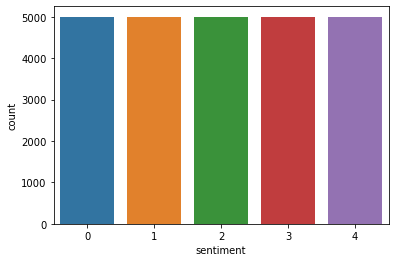

In [69]:
sns.countplot(x='sentiment', data=data_train_sm)

# CONVERTING  NUMER TO VECTOR ON LEVELING CLASS

In [11]:
from tensorflow.keras.utils import to_categorical 
train_labels = to_categorical(y_train_sm, dtype ="uint8") 
test_labels = to_categorical(y_test, dtype ="uint8")

In [16]:
print('X - train : ',X_train_sm.shape)
print('Y - train : ',train_labels.shape)
print('X - test : ',X_test.shape)
print('Y - test : ',test_labels.shape)

X - train :  (25000, 100)
Y - train :  (25000, 5)
X - test :  (3620, 100)
Y - test :  (3620, 5)


In [28]:
length = train_labels.shape[0]

In [29]:
length

25000

##PREPARING EMBEDDING MARTRIX(GLOVE)

In [12]:
from numpy import array
from numpy import asarray
from numpy import zeros

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, maxlen))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.052436  ,  0.55505002,  0.29279   , ..., -0.88300002,
         0.36973   , -1.0467    ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.15465   ,  0.43735999,  0.46147001, ..., -0.48412001,
        -0.031888  , -0.036469  ],
       [-0.31363001,  0.030338  ,  0.21382   , ...,  0.27346   ,
        -0.031612  ,  0.13628   ]])

# Trace

In [250]:
#oversample = SMOTE()
#from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
k_values = [1, 2, 3, 4, 5, 6, 7]


      
resampling=resamplingDataPrep(X_train,y_train,'Sentiment')
over = SMOTE()

#sampling_strategy = {'Nagative': 1000, 'Positive': 1000,'Storngly Nagative': 1000, 'Storngly Positive': 1000}
under = RandomUnderSampler()
steps = [('o', over), ('u', under)] 
pipeline = Pipeline(steps=steps)

#X = X.astype(np.float64)
#X=X.reshape(-1, 1)
#X, y = oversample.fit_resample(X, y)


X_train,y_train = pipeline.fit_resample(X_train, y_train_encoded)





(3785,)


In [275]:
print(np.unique(pd.DataFrame(y_train_encoded).values))

[0 1 2 3 4]


In [264]:
type(y_train)

my_df = {
         'Sentiment': y  
        } 

df1 = pd.DataFrame(my_df)
df1.head()


,Sentiment
0,Neutral
1,Positive
2,Storngly Positive
3,Nagative
4,Nagative


# Models

## Model 1

In [43]:
vocab_size


15244

In [44]:
maxLengthTrain

52

In [45]:
len(embedding_matrix)

15244

In [49]:
model = Sequential()

embedding_layer = Embedding(vocab_size, maxlen, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(128,kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(BatchNormalization())



model.add(Dense(64,kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(5, activation='softmax'))

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

print(model.summary())


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 100, 100)          1524400   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
batch_normalization_98 (Batc (None, 10000)             40000     
_________________________________________________________________
dense_39 (Dense)             (None, 256)               2560256   
_________________________________________________________________
batch_normalization_99 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_44 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_100 (Bat (None, 256)             

In [50]:
history = model.fit(X_train_sm, train_labels, batch_size=128, epochs=50, verbose=1, validation_data=(X_test,test_labels))

Train on 25000 samples, validate on 3620 samples
Epoch 1/50
25000/25000 [==============================] - 34s 1ms/sample - loss: 2.7177 - acc: 0.4898 - val_loss: 2.2855 - val_acc: 0.5597
Epoch 2/50
25000/25000 [==============================] - 33s 1ms/sample - loss: 2.3036 - acc: 0.5776 - val_loss: 2.7613 - val_acc: 0.5691
Epoch 3/50
25000/25000 [==============================] - 35s 1ms/sample - loss: 2.7573 - acc: 0.5656 - val_loss: 2.5475 - val_acc: 0.5771
Epoch 4/50
25000/25000 [==============================] - 38s 2ms/sample - loss: 2.6121 - acc: 0.5650 - val_loss: 2.4073 - val_acc: 0.5873
Epoch 5/50
25000/25000 [==============================] - 39s 2ms/sample - loss: 2.6229 - acc: 0.5671 - val_loss: 2.5498 - val_acc: 0.5845
Epoch 6/50
25000/25000 [==============================] - 40s 2ms/sample - loss: 2.9044 - acc: 0.5624 - val_loss: 2.8988 - val_acc: 0.5613
Epoch 7/50
25000/25000 [==============================] - 42s 2ms/sample - loss: 2.7880 - acc: 0.5714 - val_loss: 2.4

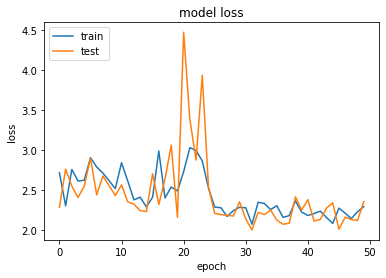

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

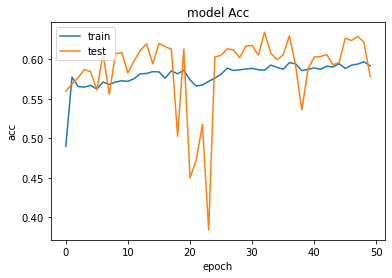

In [52]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model Acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test,test_labels, verbose=1)
score
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

# PLOT MODEL1

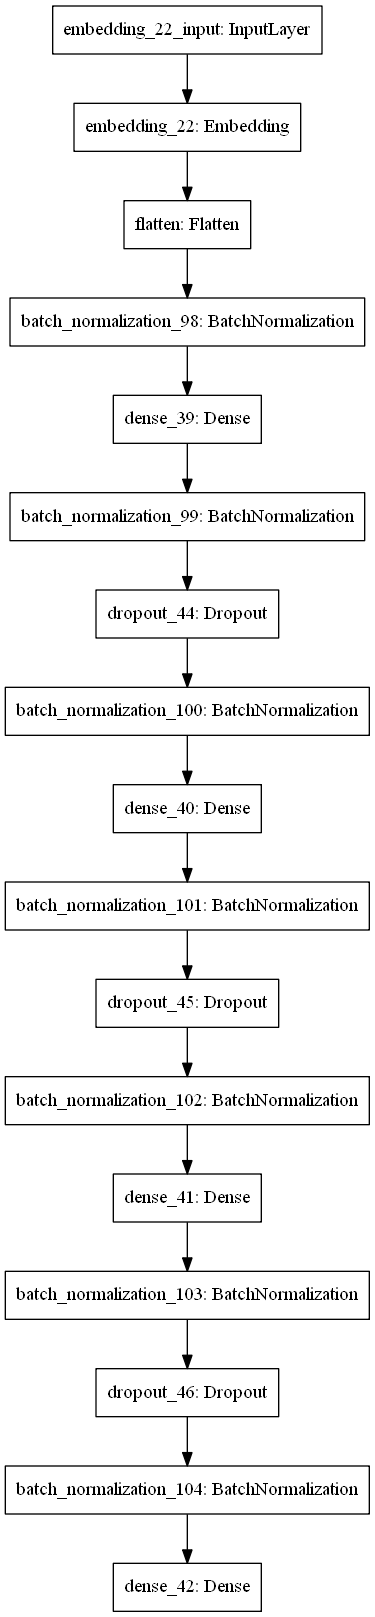

In [53]:
tensorflow.keras.utils.plot_model(model, "my_first_model.png")


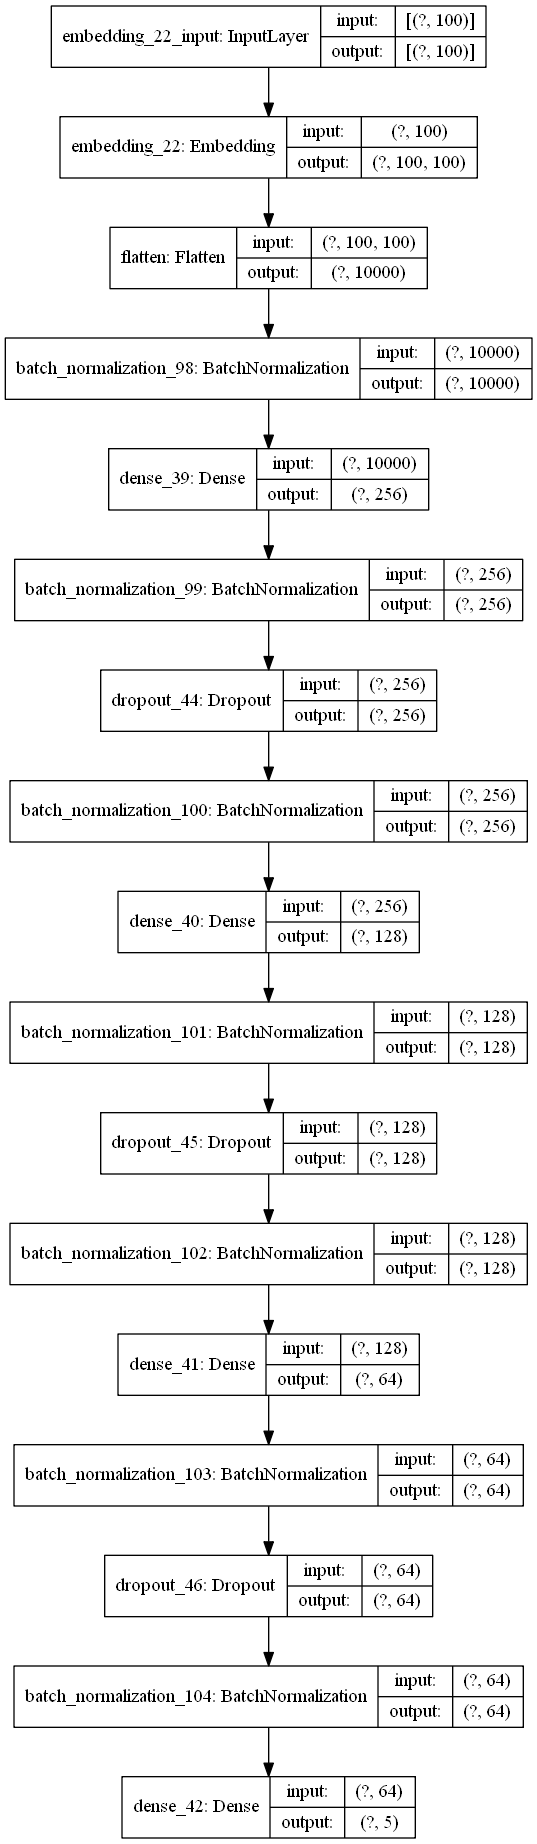

In [54]:
tensorflow.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

# SAVE MODEL1

In [55]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model) 
  
# Load the pickled model 
knn_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
knn_from_pickle.predict(X_test) 

TypeError: can't pickle _thread.RLock objects

# MODEL2

In [60]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
#model.add(BatchNormalization())

#con layer1
model.add(Conv1D(128, 5,kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(BatchNormalization())


model.add(Dense(64,activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(BatchNormalization())


model.add(Dense(5, activation='softmax'))

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 100, 100)          1524400   
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 128)               0         
_________________________________________________________________
batch_normalization_113 (Bat (None, 128)               512       
_________________________________________________________________
dropout_51 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_114 (Bat (None, 128)               512       
_________________________________________________________________
dense_47 (Dense)             (None, 64)              

In [61]:
history = model.fit(X_train_sm, train_labels, batch_size=128, epochs=10, verbose=1, validation_data=(X_test,test_labels))


Train on 25000 samples, validate on 3620 samples
Epoch 1/10
25000/25000 [==============================] - 70s 3ms/sample - loss: 1.4188 - acc: 0.5594 - val_loss: 1.2994 - val_acc: 0.6414
Epoch 2/10
25000/25000 [==============================] - 69s 3ms/sample - loss: 1.2792 - acc: 0.6333 - val_loss: 1.2172 - val_acc: 0.6967
Epoch 3/10
25000/25000 [==============================] - 59s 2ms/sample - loss: 1.2719 - acc: 0.6441 - val_loss: 1.1702 - val_acc: 0.6970
Epoch 4/10
25000/25000 [==============================] - 58s 2ms/sample - loss: 1.2789 - acc: 0.6483 - val_loss: 1.1684 - val_acc: 0.7127
Epoch 5/10
25000/25000 [==============================] - 61s 2ms/sample - loss: 1.2718 - acc: 0.6510 - val_loss: 1.2872 - val_acc: 0.6724
Epoch 6/10
25000/25000 [==============================] - 58s 2ms/sample - loss: 1.2690 - acc: 0.6530 - val_loss: 1.1845 - val_acc: 0.6972
Epoch 7/10
25000/25000 [==============================] - 59s 2ms/sample - loss: 1.2734 - acc: 0.6474 - val_loss: 1.2

In [71]:
score = model.evaluate(X_test,test_labels, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3620/3620 [==============================] - 45s 12ms/sample - loss: 1.6018 - acc: 0.2472
Test Score: 1.6017727575249434
Test Accuracy: 0.24723756


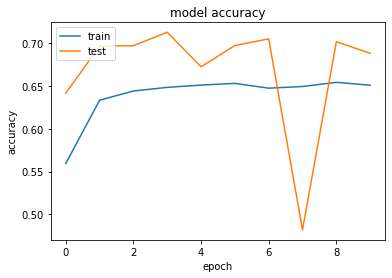

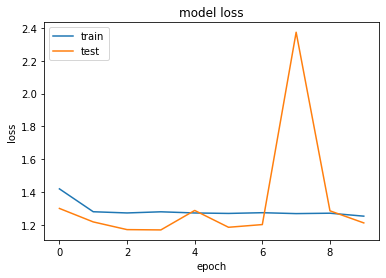

In [63]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# PLOT MODEL2

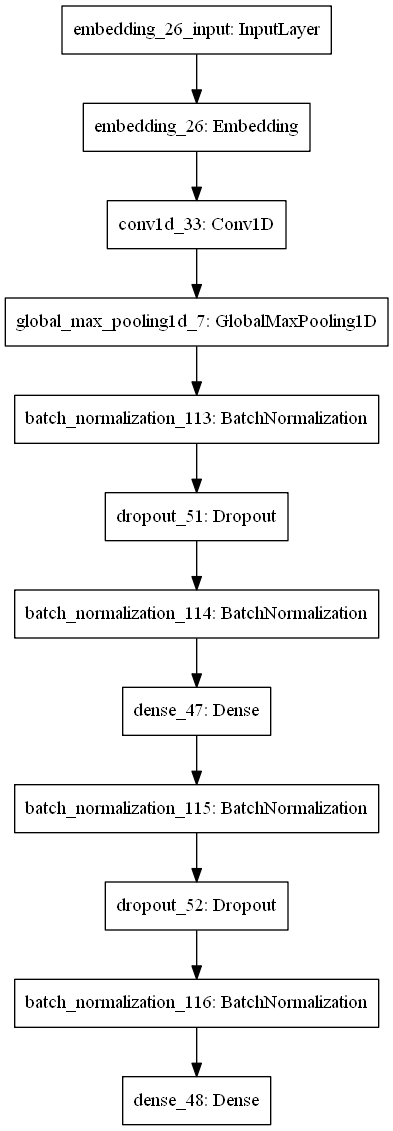

In [65]:
tensorflow.keras.utils.plot_model(model, "model2.png")


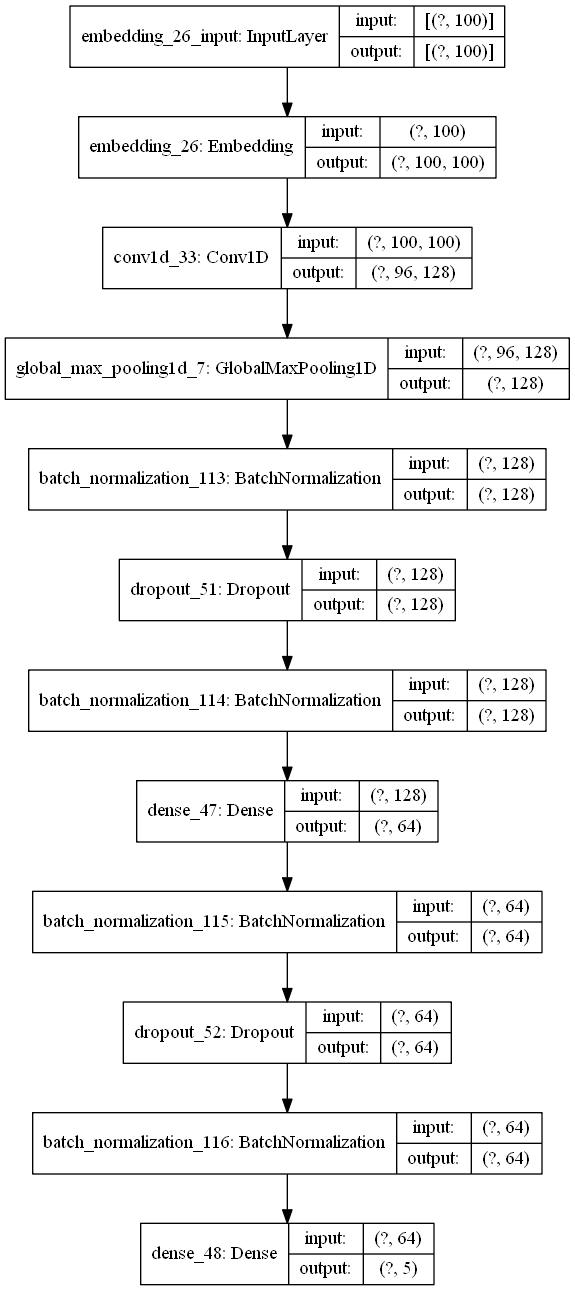

In [66]:
tensorflow.keras.utils.plot_model(model, "model2_with_shape_info.png", show_shapes=True)

# #MODEL3

In [68]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)


#LSTM LAYER
#kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
model.add(LSTM(256))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(BatchNormalization())


model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(5, activation='softmax'))
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 100, 100)          1524400   
_________________________________________________________________
lstm_5 (LSTM)                (None, 256)               365568    
_________________________________________________________________
batch_normalization_126 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_58 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_127 (Bat (None, 256)               1024      
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 256)             

In [ ]:
history = model.fit(X_train_sm, train_labels, batch_size=128, epochs=50, verbose=1, validation_data=(X_test,test_labels))


Train on 25000 samples, validate on 3620 samples
Epoch 1/50
25000/25000 [==============================] - 764s 31ms/sample - loss: 1.5849 - acc: 0.2556 - val_loss: 1.5808 - val_acc: 0.2511
Epoch 2/50
25000/25000 [==============================] - 733s 29ms/sample - loss: 1.5858 - acc: 0.2537 - val_loss: 1.5899 - val_acc: 0.2528
Epoch 3/50
25000/25000 [==============================] - 661s 26ms/sample - loss: 1.5879 - acc: 0.2524 - val_loss: 1.5843 - val_acc: 0.2525
Epoch 4/50
25000/25000 [==============================] - 612s 24ms/sample - loss: 1.5852 - acc: 0.2579 - val_loss: 1.5760 - val_acc: 0.2773
Epoch 5/50
 8192/25000 [========>.....................] - ETA: 9:16 - loss: 1.5834 - acc: 0.2605

In [72]:
score = model.evaluate(X_test,test_labels, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3620/3620 [==============================] - 50s 14ms/sample - loss: 1.6018 - acc: 0.2472
Test Score: 1.6017727575249434
Test Accuracy: 0.24723756


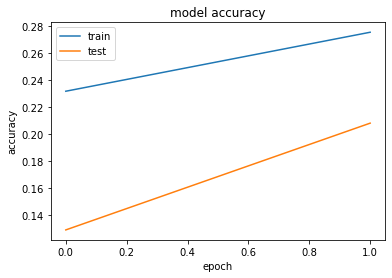

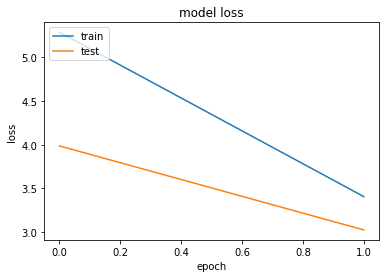

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

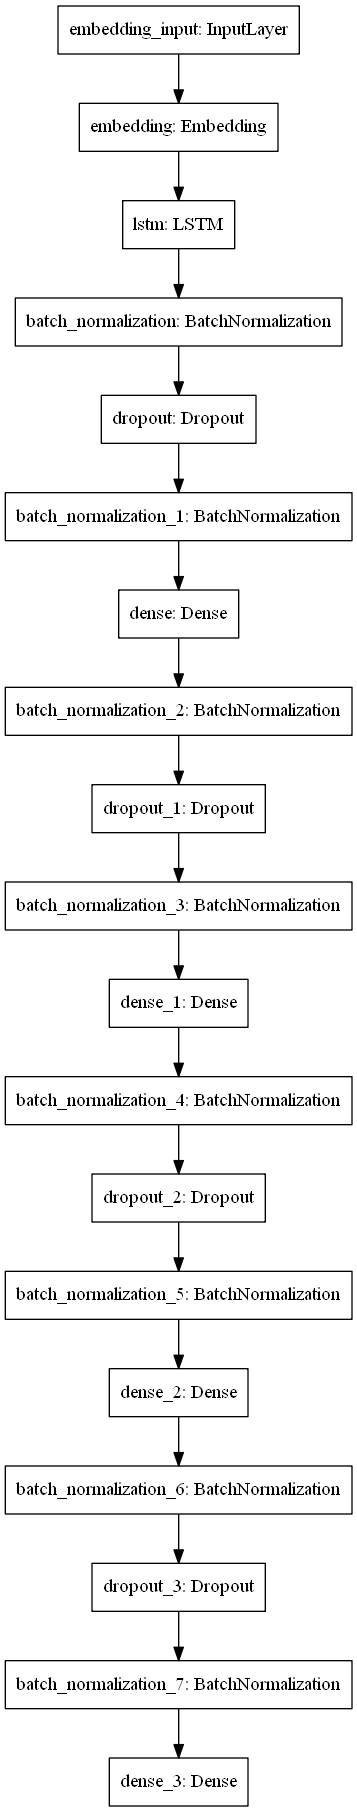

In [16]:
tensorflow.keras.utils.plot_model(model, "my_first_model.png")


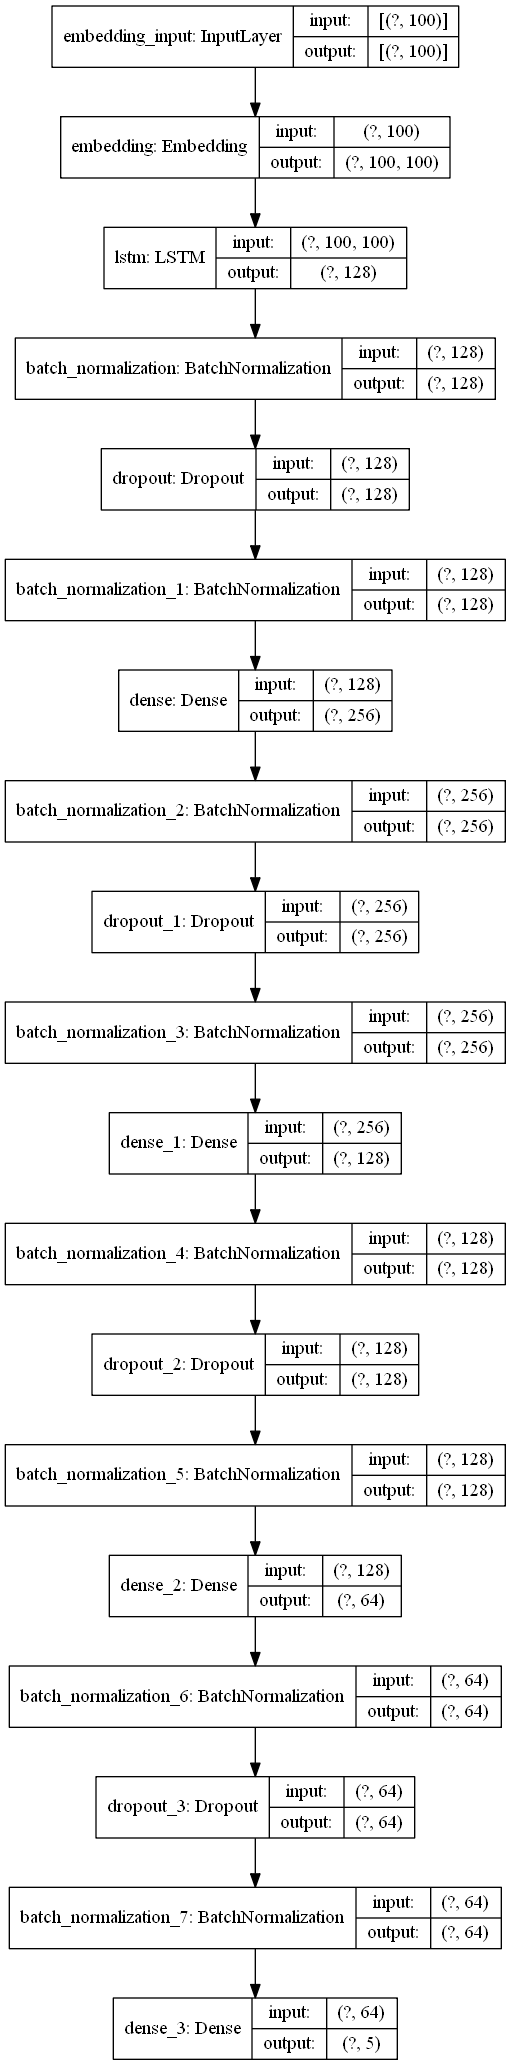

In [17]:
tensorflow.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [81]:
instance = X[27]
print(instance)

In one afternoon and while convalescing from coronavirus just held an impromptu rally with more suppor…


In [82]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]
#print(flat_list)
instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[7.5794365e-14]], dtype=float32)